In [12]:
import gensim
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.manifold import TSNE
from itertools import islice
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_colwidth", 200)
stemmer = PorterStemmer()
model = re.compile('@\w+')
model2 = re.compile('[^a-zA-Z0-9#]')

In [3]:
data = pd.read_csv("C:/Users/deepak/Downloads/twitter_data.csv")
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
data['tweet'] = data['tweet'].apply(lambda r: model.sub("", r))
data['tweet'] = data['tweet'].apply(lambda r: model2.sub(" ", r))
data['tweet'] = data['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data['tweet'] = data['tweet'].apply(lambda x: " ".join(stemmer.stem(i) for i in x.split()))
data.head()

,id,label,tweet
0,1,0,when father dysfunct selfish drag kid into dysfunct #run
1,2,0,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0,bihday your majesti
3,4,0,#model love take with time
4,5,0,factsguid societi #motiv


In [5]:
tokens = data['tweet'].apply(lambda z: [x for x in word_tokenize(z) if len(x)>2])
tokens_list = tokens.tolist()
tokens_list[0:2]

[['when',
  'father',
  'dysfunct',
  'selfish',
  'drag',
  'kid',
  'into',
  'dysfunct',
  'run'],
 ['thank',
  'lyft',
  'credit',
  'caus',
  'they',
  'offer',
  'wheelchair',
  'van',
  'disapoint',
  'getthank']]

In [6]:
model = gensim.models.Word2Vec(tokens_list, min_count=1, size=200)
model.train(tokens_list, total_examples= len(tokens_list), epochs=20)

(4609614, 4929620)

In [7]:
model.wv.most_similar(positive="trump")

[('endors', 0.8571673035621643),
 ('hillari', 0.8527707457542419),
 ('donald', 0.8468760848045349),
 ('obama', 0.8454874753952026),
 ('potu', 0.8440679311752319),
 ('berni', 0.839707612991333),
 ('suppoer', 0.8339231014251709),
 ('voter', 0.831113874912262),
 ('campaign', 0.8258217573165894),
 ('racist', 0.820561408996582)]

In [8]:
wanted_words = []
count = 0
for word in model.wv.vocab:
    if count<200:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, model.wv.vocab[k]) for k in wanted_words if k in model.wv.vocab)

In [9]:
def take(n, iterable):
    return list(islice(iterable, n))

take(10, wanted_vocab.items())

[('when', <gensim.models.keyedvectors.Vocab at 0x235954ba748>),
 ('father', <gensim.models.keyedvectors.Vocab at 0x23594318c88>),
 ('dysfunct', <gensim.models.keyedvectors.Vocab at 0x23594318ba8>),
 ('selfish', <gensim.models.keyedvectors.Vocab at 0x235943185f8>),
 ('drag', <gensim.models.keyedvectors.Vocab at 0x235946d0ba8>),
 ('kid', <gensim.models.keyedvectors.Vocab at 0x235946d0ac8>),
 ('into', <gensim.models.keyedvectors.Vocab at 0x235946d0b70>),
 ('run', <gensim.models.keyedvectors.Vocab at 0x235946d0f60>),
 ('thank', <gensim.models.keyedvectors.Vocab at 0x235946d09e8>),
 ('lyft', <gensim.models.keyedvectors.Vocab at 0x235946d0b38>)]

In [10]:
X = model[wanted_vocab] 
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

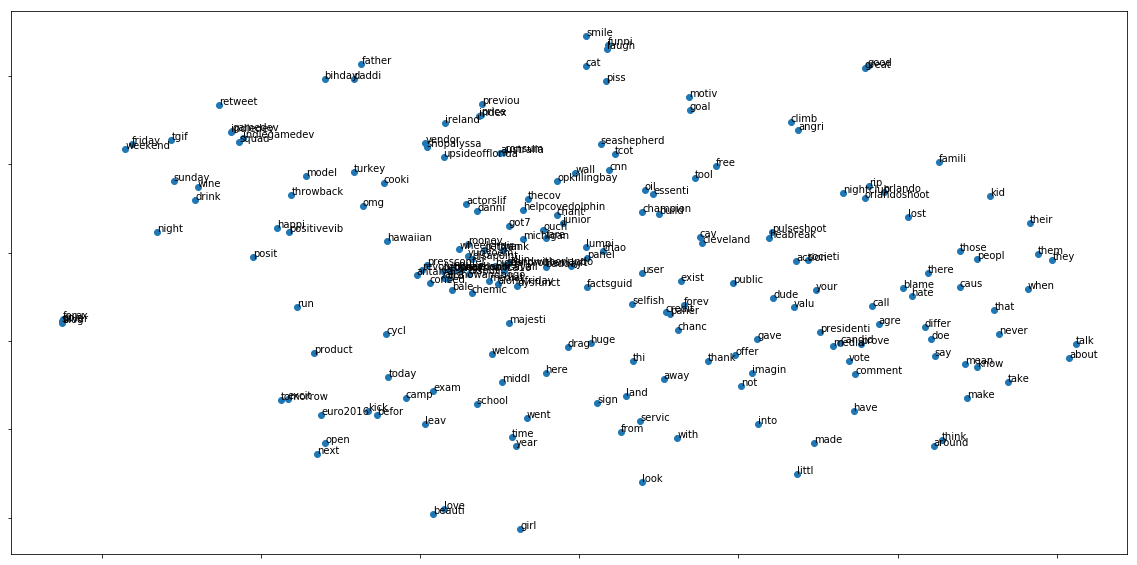

In [11]:
#Plot the t-SNE output
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()

Ref: https://www.kaggle.com/liananapalkova/simply-about-word2vec